In [ ]:
from google.colab import drive

drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


PERSON DETECTED:  1
GUN DETECTED 1 



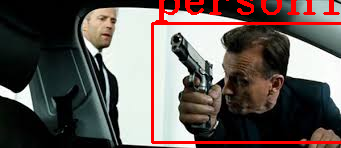

In [ ]:
# FOR IMAGE
import cv2
import numpy as np
import matplotlib.pyplot as plt
# import winsound
from google.colab.patches import cv2_imshow


# --------------------Person


# video_capture = cv2.VideoCapture('Test1_Trim.mp4')
# frame_width = int(video_capture.get(3))
# frame_height = int(video_capture.get(4))
# fps = video_capture.get(cv2.CAP_PROP_FPS)

fourcc = cv2.VideoWriter_fourcc('X','V','I','D')

# result = cv2.VideoWriter("output.avi", fourcc, 5.0, (1280,720))

# size = (frame_width, frame_height)
# result = cv2.VideoWriter('output.avi',cv2.VideoWriter_fourcc(*'MJPG'),
#     fps,
#     (640, 480))
# result = cv2.VideoWriter('filename.mp4',
#                          cv2.VideoWriter_fourcc(*'MJPG'),
#                          10, size)
# while True:
# ret, img = video_capture.read()
#
# if ret:
net = cv2.dnn.readNet("yolov3.weights", "yolov3.cfg")
# classes = []
img = cv2.imread('339.jpeg')
with open("coco.names", "r") as f:
    classes = [line.strip() for line in f.readlines()]
layer_names = net.getLayerNames()
output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]
colors = [0, 0, 255]
# img = cv2.resize(img, (1280, 720))
height, width, channels = img.shape
blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
net.setInput(blob)
outs = net.forward(output_layers)
class_ids = []
confidences = []
boxes = []
for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.5:
            # Object detected
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width*1.13)
            h = int(detection[3] * height)

            # Rectangle coordinates
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)

            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)

net2 = cv2.dnn.readNetFromDarknet("yolov3_custom.cfg", r"yolov3_custom_4000.weights")
classes2 = ['notGun', 'gun']
indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)
count=1
count2=1
count3=1

font = cv2.FONT_HERSHEY_COMPLEX_SMALL
for i in range(len(boxes)):
    if i in indexes:
        if classes[class_ids[i]] == 'person':
            x, y, w, h = boxes[i]
            label = str(classes[class_ids[i]])
            # color = colors[class_ids[i]]
            color = colors
            label2 = label+str(count)
            # cv2.putText(img, label2, (x, y-10), font, 2, color, 2)
            # cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)
            print("PERSON DETECTED: ", count)

            # CROPPING IMAGE:
            crop_img = img[0:y + h, 0:x + w]


            # # cv2.imshow("Image number {}".format(i), crop_img)
            count +=1
            #
            # GUN DETECTION:
            blob2 = cv2.dnn.blobFromImage(crop_img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
            net2.setInput(blob2)
            output_layers_name = net2.getUnconnectedOutLayersNames()
            layerOutputs = net2.forward(output_layers_name)
            height2, width2, channels = crop_img.shape
            boxes2 = []
            confidences2 = []
            class_ids2 = []

            for output in layerOutputs:
                for detection in output:
                    score = detection[5:]
                    class_id2 = np.argmax(score)
                    confidence = score[class_id2]
                    if confidence > 0.7:
                        center_x2 = int(detection[0] * width2)
                        center_y2 = int(detection[1] * height2)
                        w2 = int(detection[2] * width2)
                        h2 = int(detection[3] * height2)

                        x2 = int(center_x2 - w2 / 2)
                        y2 = int(center_y2 - h2 / 2)

                        boxes2.append([x2, y2, w2, h2])
                        confidences2.append((float(confidence * 100)))
                        class_ids2.append(class_id2)
            indexes2 = cv2.dnn.NMSBoxes(boxes2, confidences2, 0.5, 0.4)
            #
            # # BOUNDING BOX person:
            if len(indexes2) > 0:
                for i in indexes2.flatten():
                    if (classes2[class_ids2[i]] == 'gun'):
                        x2, y2, w2, h2 = boxes2[i]
                        label = str(classes2[class_ids2[i]])
                        confidence2 = str(round(confidences2[i], 2))
                        # color = colors[i]
                        color = colors
                        # cv2.rectangle(crop_img, (x2, y2), (x2 + w2, y2 + h2), color, 2)
                        # cv2.putText(crop_img, label, (x2, y2-10), font, 2, color, 2)
                        cv2.putText(img, label2, (x, y - 10), font, 2, color, 2)
                        cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)

                        cv2.putText(img, label, (x, y - 50), font, 2, color, 2)
                        cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)

                        print("GUN DETECTED", count2, "\n")
                        # result.write(img)
                        # winsound.Beep(1000, 100)
            else:
                print("Gun Not Detected\n")

            # Bounding Box for Gun
            # if i in indexes2:
            #     print(class_ids2[i])
            #     if (classes2[class_ids2[i]] == 'gun'):
            #         x, y, w, h = boxes2[i]
            #         label = str(classes2[class_ids2[i]])
            #         color = colors[class_ids[i]]
            #         cv2.putText(img, label, (x, y-10), font, 2, color, 2)
            #         cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)
            #         print(classes2[class_ids2[i]])

    #     cv2.imshow('Video', img)
    #     result.write(img)
    #     if cv2.waitKey(1) & 0xFF == ord('q'):
    #         break
    # else:
    #     break

# cv2.imshow("Image", img)
cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()


# video_capture.release()
# result.release()
# cv2.destroyAllWindows()

In [ ]:
# FOR VIDEO
import cv2
import numpy as np
import matplotlib.pyplot as plt
# import winsound
from google.colab.patches import cv2_imshow



# --------------------Person


video_capture = cv2.VideoCapture('Test1_Trim.mp4')
# video_capture="Test1_Trim.mp4"
video_path="Test1_Trim.mp4"
video_capture = cv2.VideoCapture(video_path)

frame_width = int(video_capture.get(3))
frame_height = int(video_capture.get(4))
fps = video_capture.get(cv2.CAP_PROP_FPS)

# fourcc = cv2.VideoWriter_fourcc('X','V','I','D')
fourcc = cv2.VideoWriter_fourcc(*'XVID')
# out = cv2.VideoWriter('Test1_Trim.mp4',fourcc, 5, (640,480))



# result1 = cv2.VideoWriter('output1.avi', fourcc, 5.0, (1280,720))

# size = (frame_width, frame_height)
# result2 = cv2.VideoWriter('output2.avi',cv2.VideoWriter_fourcc(*'MJPG'),
#     fps,
#     (640, 480))
result3 = cv2.VideoWriter('output3.mp4',
                         fourcc,5, (640,480))
with open("coco.names", "r") as f:
    classes = [line.strip() for line in f.readlines()]

frameCount = 0
while True:
    # ret, img = video_capture.read()
    ret, imgxx = video_capture.read()

    if ret:
        img = cv2.resize(imgxx,(640,480),fx=0,fy=0, interpolation = cv2.INTER_CUBIC)
        net = cv2.dnn.readNet("yolov3.weights", "yolov3.cfg")
        # classes = []
        # img = cv2.imread('img19.jpg')
        layer_names = net.getLayerNames()
        output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]
        colors = [0, 0, 255]
        img = cv2.resize(img, (1280, 720))
        height, width, channels = img.shape
        blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
        net.setInput(blob)
        outs = net.forward(output_layers)
        class_ids = []
        confidences = []
        boxes = []
        for out in outs:
            for detection in out:
                scores = detection[5:]
                class_id = np.argmax(scores)
                confidence = scores[class_id]
                if confidence > 0.5:
                    # Object detected
                    center_x = int(detection[0] * width)
                    center_y = int(detection[1] * height)
                    w = int(detection[2] * width*1.13)
                    h = int(detection[3] * height)

                    # Rectangle coordinates
                    x = int(center_x - w / 2)
                    y = int(center_y - h / 2)

                    boxes.append([x, y, w, h])
                    confidences.append(float(confidence))
                    class_ids.append(class_id)

        net2 = cv2.dnn.readNetFromDarknet("yolov3_custom.cfg", r"yolov3_custom_4000.weights")
        classes2 = ['notGun', 'gun']
        indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)
        count=1
        count2=1
        count3=1

        font = cv2.FONT_HERSHEY_COMPLEX_SMALL
        for i in range(len(boxes)):
            if i in indexes:
                if classes[class_ids[i]] == 'person':
                    x, y, w, h = boxes[i]
                    label = str(classes[class_ids[i]])
                    # color = colors[class_ids[i]]
                    color = colors
                    label2 = label+str(count)
                    # cv2.putText(img, label2, (x, y-10), font, 2, color, 2)
                    # cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)
                    # print("PERSON DETECTED: ", count)

                    # CROPPING IMAGE:
                    crop_img = img[0:y + h, 0:x + w]


                    # # cv2.imshow("Image number {}".format(i), crop_img)
                    count +=1
                    #
                    # GUN DETECTION:
                    blob2 = cv2.dnn.blobFromImage(crop_img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
                    net2.setInput(blob2)
                    output_layers_name = net2.getUnconnectedOutLayersNames()
                    layerOutputs = net2.forward(output_layers_name)
                    height2, width2, channels = crop_img.shape
                    boxes2 = []
                    confidences2 = []
                    class_ids2 = []

                    for output in layerOutputs:
                        for detection in output:
                            score = detection[5:]
                            class_id2 = np.argmax(score)
                            confidence = score[class_id2]
                            if confidence > 0.7:
                                center_x2 = int(detection[0] * width2)
                                center_y2 = int(detection[1] * height2)
                                w2 = int(detection[2] * width2)
                                h2 = int(detection[3] * height2)

                                x2 = int(center_x2 - w2 / 2)
                                y2 = int(center_y2 - h2 / 2)

                                boxes2.append([x2, y2, w2, h2])
                                confidences2.append((float(confidence * 100)))
                                class_ids2.append(class_id2)
                    indexes2 = cv2.dnn.NMSBoxes(boxes2, confidences2, 0.5, 0.4)
                    #
                    # # BOUNDING BOX person:
                    if len(indexes2) > 0:
                        for i in indexes2.flatten():
                            if (classes2[class_ids2[i]] == 'gun'):
                                x2, y2, w2, h2 = boxes2[i]
                                label = str(classes2[class_ids2[i]])
                                confidence2 = str(round(confidences2[i], 2))
                                # color = colors[i]
                                color = colors
                                # cv2.rectangle(crop_img, (x2, y2), (x2 + w2, y2 + h2), color, 2)
                                # cv2.putText(crop_img, label, (x2, y2-10), font, 2, color, 2)
                                cv2.putText(img, label2, (x, y - 10), font, 2, color, 2)
                                cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)

                                cv2.putText(img, label, (x, y - 10), font, 2, color, 2)
                                cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)

                                # print("GUN DETECTED", count2, "\n")
                                # result.write(img)
                                # winsound.Beep(1000, 100)
                    else:
                        # print("Gun Not Detected\n")
                        print("")

                    # Bounding Box for Gun
                    # if i in indexes2:
                    #     print(class_ids2[i])
                    #     if (classes2[class_ids2[i]] == 'gun'):
                    #         x, y, w, h = boxes2[i]
                    #         label = str(classes2[class_ids2[i]])
                    #         color = colors[class_ids[i]]
                    #         cv2.putText(img, label, (x, y-10), font, 2, color, 2)
                    #         cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)
                    #         print(classes2[class_ids2[i]])

            #     cv2.imshow('Video', img)
            #     result.write(img)
            #     if cv2.waitKey(1) & 0xFF == ord('q'):
            #         break
            # else:
            #     break

        # cv2_imshow(img)
        print("Frame: ", frameCount)
        frameCount+=1
        result3.write(img)
        # result1.write(img)
        # result2.write(img)
        result3.write(img)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
# cv2.destroyAllWindows()
video_capture.release()
result.release()
cv2.destroyAllWindows()

In [ ]:
from IPython.display import HTML
from base64 import b64encode
mp4 = open("Test1_Trim.mp4",'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=1100 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

In [ ]:
video_path="Test1_Trim.mp4"
video = cv2.VideoCapture(video_path)

success = True
countxx = 1
while success:
  success,frame = video.read()
  if success == True:
    print("Fame {} successful", format(countxx))
    countxx += 1
  else:
    break

In [ ]:
# FACE DETECTION